In [2]:
from igraph import *
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
def find_all_shortest_paths(graph):
    sp_list = defaultdict(int)
    n_nodes = len(graph.vs)
    for i in range(n_nodes):
        for j in range(i, n_nodes):
            source = graph.vs[i]
            destination = graph.vs[j]
            sp_list[(source.index, destination.index)] = graph.get_all_shortest_paths(v=source, to=destination)
    return sp_list

In [4]:
def find_betweeness(graph, sp_list):
    edge_between = defaultdict(int)
    for _, paths in sp_list.items():
        for path in paths:
            for i in range(len(path)-1):
                e = tuple(sorted([path[i], path[i + 1]]))
                edge_between[e] += (1/len(paths))
    return edge_between

In [5]:
def remove_top_k(graph, edge_between, k):
    top_edges = sorted(edge_between.keys(), key=operator.itemgetter(1))[-1:-(k + 1):-1]
    graph.delete_edges(top_edges)
    return graph

In [6]:
def modularity(graph, edge_between):
    membership = graph.components().membership
    n_comp = len(np.unique(membership))
    mod = 0
    n = len(graph.vs)
    m = len(graph.es)
    for i in range(n):
        for j in range(n):
            if membership[i] == membership[j]:
                    if (graph.get_eid(i, j, directed=False, error=False) != -1):
                        mod += 1
                    mod -= (graph.degree(i) * graph.degree(j) / (2 * m))
    
    mod /= (2*m)
    mod = mod if mod > 0 else 0
    return mod

In [12]:
def plot(graph, max_comp):
    component = []
    modu = []
    while True:
        try:
            if len(np.unique(graph.components().membership)) >= max_comp:
                break
            sp_list = find_all_shortest_paths(graph)
            edge_between = find_betweeness(graph, sp_list)
            modu.append(modularity(graph, edge_between))
            component.append(len(np.unique(graph.components().membership)))
            if len(modu) % 10 == 0:
                print(len(modu))
            graph = remove_top_k(graph, edge_between, 5)
        except Exception:
            break
    plt.plot(component,modu)
    plt.show()
    return component, modu

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420


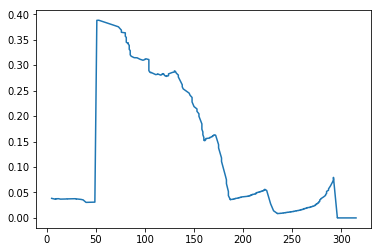

In [13]:
f = open("../../Flickr_sampled_edges/edges_sampled_map_2K.csv")
g = open("A.txt", "w")
for item in f.readlines():
    item = item.replace(",", " ")
    g.write(item)
g.close()
graph = Graph.Read_Ncol("A.txt", directed=False)
n_comp, modulariy_s = plot(graph, 300)